# Final Project - Fatal Police Shootings
### By : Harrish Thasarathan, Tamilesh Balasuntharam and Shawn Yama
We chose to analyze a dataset called Fatal Police Shootings, 2015-Present. We found this dataset [here](https://www.kaggle.com/washingtonpost/police-shootings). This dataset contains 2142 rows and 14 columns. Every row represents a fatal police shooting and the columns include the details about the shooting that are unique to every person. We were compelled by this dataset because fatal police shootings are shown in media to be a significant problem in the United States of America. By analyzing this dataset we can figure out what type of people get fatally shot the most and make an informed decision about media representations in this age of fake news. Our hypothesis states that more minorities are being killed by cops, particularly African American males.

Importing essential packages as well as seaborn. Seaborn makes plotting data easier.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

## Curiosity and Exploration
We started off by analyzing the range of age of individuals fatally shot by police. We found the youngest and oldest age as well as the average age.

In [82]:
df = pd.read_csv('database.csv')
df.shape
largest, smallest, mean = np.max(df['age']),np.min(df['age']),np.mean(df['age'])
print('max age:',largest, 'min age:', smallest , 'mean age:', mean)


max age: 86.0 min age: 6.0 mean age: 36.48451643639829


We found how many rows and columns there are in the dataset:

In [83]:
df.shape

(2142, 14)

Here we printed out the beginning of the dataset to understand what variables are representing the data. For example now we know that the flee column is represented by a string. One can wrongly assume that it's boolean so it's good we made sure.

In [57]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Testing the data by plotting the different ways they are fleeing.

Text(0,0.5,'Number of instances per Flee entry')

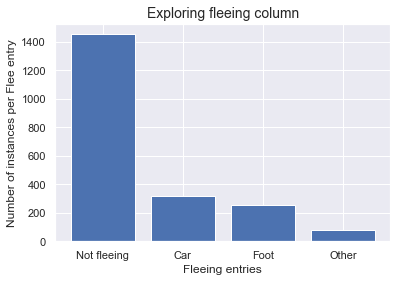

In [84]:
fleeing_count = df['flee'].value_counts()
fleeing_count = pd.DataFrame(fleeing_count).reset_index()

plt.bar(fleeing_count['index'],fleeing_count['flee'])
plt.title("Exploring fleeing column",fontsize = 14)
plt.xlabel("Fleeing entries")
plt.ylabel("Number of instances per Flee entry")

Exploring the minmum ages of black and white people who got fatally shot.

In [87]:
b_shot = df.loc[df['race']=='B']
w_shot = df.loc[df['race'] == 'W']

w_youngest = df.loc[df['age']== np.min(b_shot['age'])]
bl_youngest = df.loc[df['age'] == np.min(w_shot['age'])]
bl_youngest

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
830,980,Jeremy Mardis,2015-11-03,shot,unarmed,6.0,M,W,Marksville,LA,False,other,Car,True


The row above is the youngest African American who was shot, Jeremy Mardis age 6. [Here](https://www.cbsnews.com/news/officer-sentenced-in-shooting-death-of-boy-with-autism/) is a link to an article about him.

In [86]:
w_youngest

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1678,1883,Tyre King,2016-09-14,shot,toy weapon,13.0,M,B,Columbus,OH,False,other,Foot,False


The row above is the youngest Caucasian who was shot, Tyre King age 13. [Here](https://www.cnn.com/2016/09/15/us/ohio-columbus-police-kill-teen/index.html) is a link to an article about him.

Checking the mean age per race for the different ways individuals died in the dataset.

In [88]:
manner_of_death = df.groupby(['manner_of_death','race']).age.mean()
manner_of_death = pd.DataFrame(manner_of_death).reset_index()
manner_of_death

,manner_of_death,race,age
0,shot,A,38.448276
1,shot,B,31.469185
2,shot,H,32.905045
3,shot,N,31.214286
4,shot,O,32.625000
5,shot,W,39.815240
6,shot and Tasered,A,29.000000
7,shot and Tasered,B,33.548387
8,shot and Tasered,H,33.708333
9,shot and Tasered,O,35.750000


## Race and Age Analysis
At this point we will analyse the data in more detail, specifically in terms of race and age. We will do this by splitting the dataset into two dataframes. One dataframe contains people less than age 20 and another with people greater than age 20. These new dataframes will be analyzed in terms of race. 

In [90]:
age_under_20 = df.loc[df['age']<20]
age_over_20 = df.loc[df['age']>20]

age_over_20 = pd.DataFrame(age_over_20).reset_index()
age_under_20 = pd.DataFrame(age_under_20).reset_index()

Before we start analysing it we must consider a proportional sample of races. There is a great majority of Caucasians in America so it will appear as if white people are the most affected race if we don't even out these proportions. [Here](https://www.census.gov/quickfacts/fact/table/US/PST045217) is the link we used to find the race percentages in America to obtain a more accurate representation of trends against different races in America. 

In [94]:
#total race counts in USA calculated from total population from US census bureau
total_counts = np.array([46643800,197699990,58951700,18890600,4234100,11073800])

def getRaceCounts(y): 
    countB=countW=countH=countO=countN=countA=countN = 0
    for x in y['race']: 
        if x == 'B': 
            countB += 1
        if x == 'W': 
            countW += 1
        if x == 'H': 
            countH += 1
        if x == 'O': 
            countO += 1
        if x == 'N': 
            countN +=1 
        if x == 'A':
            countA +=1 
    counts = np.array([countB, countW, countH, countA, countN, countO])
    return counts/total_counts*100

index = ['Black','White','Hispanic','Asian','Native','Other']

First we will change the unadjusted values into percentages and then plot them in a pie graph. This pie chart specifically takes into account those who are under 20. We are still using the unadjusted values in order to compare how different the distribution will be with the adjusted values.

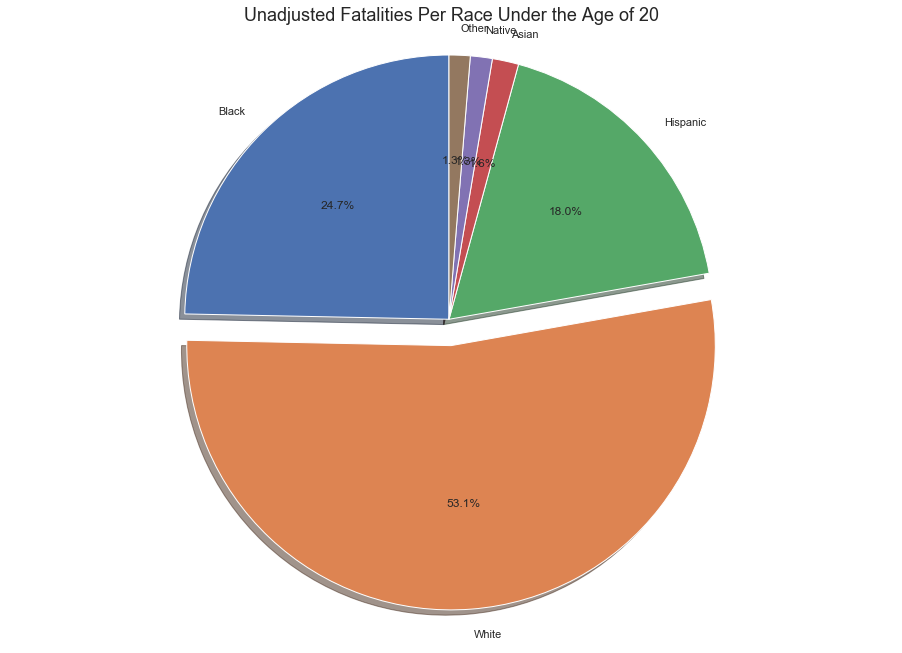

In [95]:
#Graph unadjusted race counts
y20_unadjusted = getRaceCounts(age_under_20)/100 * total_counts #/100 *total counts to undo adjustment built into getRaceCounts function
y40_unadjusted = getRaceCounts(age_over_20)/100 * total_counts

explode = (0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
a4_dims = (15.7,11.27)
fig1, ax1 = plt.subplots(figsize = a4_dims)
ax1.pie(y40_unadjusted, explode=explode, labels=index, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Unadjusted Fatalities Per Race Under the Age of 20', fontsize = 18)
plt.show()

The pi chart shows that white people are the most fatally shot race by the police. Now it is time to see how different the distribution is once the adjusted values are used instead. For the adjusted percentages we are plotting two bar graphs. One will show the percentage of races over 20 who were fatally shot and the other will show the same thing with the age being over 20.

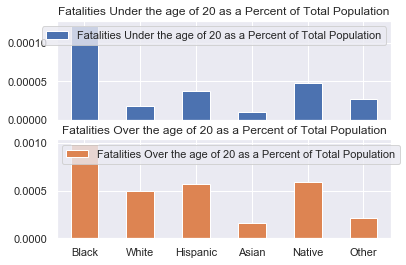

In [92]:
y20_adjusted = getRaceCounts(age_under_20)
y40_adjusted = getRaceCounts(age_over_20)

compare_age_race = pd.DataFrame({'Fatalities Under the age of 20 as a Percent of Total Population':y20_adjusted,
                    'Fatalities Over the age of 20 as a Percent of Total Population':y40_adjusted},index = index)

axes = compare_age_race.plot.bar(rot = 0,subplots = True)
axes[1].legend(loc = 2);

The adjusted version shows that black people tend to be fatally shot by police more than white people. The high percentages of hispanic and natives compared to whites are surprising as well. Taking an equal sample of every race truly yields different results!

Now we will analyze people who are underage and possess a gun between the ages of 16 and 21. Here we are checking how many are armed and unarmed. Also we will analyze those who have a gun and are a threat. Our focus will be unarmed individuals since police should refrain from shooting an unarmed man. 

In [98]:
age21 = (df['age'] >= 16) & (df['age'] <= 21)
age21Unarmed = ((df['age'] >= 16) & (df['age'] <= 21) & (df['armed'] == 'unarmed'))
age21Gun = ((df['age'] >= 16) & (df['age'] <= 21) & (df['armed'] == 'gun'))
age21GunandThreat = ((df['age'] >= 16) & (df['age'] <= 21) & (df['armed'] == 'gun') & (df['threat_level'] == True))

In [99]:
age21DataU = df.loc[age21Unarmed]
age21DataU 

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
147,187,Deven Guilford,2015-02-28,shot and Tasered,unarmed,17.0,M,W,Roxand Township,MI,False,attack,Not fleeing,True
166,203,Tony Robinson,2015-03-06,shot,unarmed,19.0,M,B,Madison,WI,False,attack,Foot,False
206,295,Jamison Childress,2015-03-19,shot,unarmed,20.0,M,W,Sumas,WA,True,attack,Not fleeing,False
209,229,Brandon Jones,2015-03-19,shot,unarmed,18.0,M,B,Cleveland,OH,False,attack,Not fleeing,False
299,391,William Chapman,2015-04-22,shot,unarmed,18.0,M,B,Portsmouth,VA,False,undetermined,Not fleeing,False
306,409,Hector Morejon,2015-04-23,shot,unarmed,19.0,M,H,Long Beach,CA,False,other,Not fleeing,False
387,491,Feras Morad,2015-05-27,shot and Tasered,unarmed,20.0,M,O,Long Beach,CA,False,other,Not fleeing,False
396,500,Ebin Lamont Proctor,2015-05-30,shot,unarmed,19.0,M,W,Cottonwood,AZ,False,attack,Foot,False
479,592,John Deming,2015-07-05,shot,unarmed,19.0,M,W,Pleasanton,CA,False,attack,Foot,False
530,657,Darrius Stewart,2015-07-17,shot,unarmed,19.0,M,B,Memphis,TN,False,attack,Foot,False


Here we made a bar graph using the unproportionate values of those who are unarmed and got shot. The graph shows that black people are fatally injured the most. Once again we review the unadjusted data to reiterate how much of a difference adjusting values for percent population makes on overall trends. 

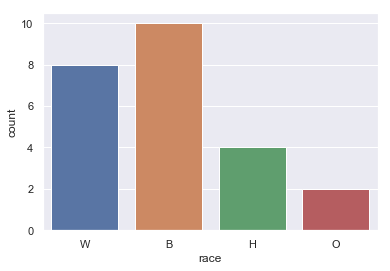

In [100]:
sns.countplot(age21DataU['race']);

Next we will do the same thing but using proportionate values. This version of the graph shows that African Americans are fatally shot a lot more and Caucasians a lot less when compared to the previous graph when analyzing incidents with people under 21.

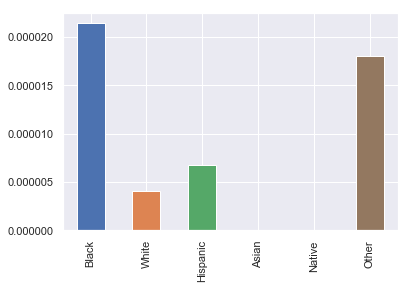

In [97]:
race21CountU = getRaceCounts(age21DataU)
race21CountU_Series = pd.Series(race21CountU, index = index)
race21CountU_Series.plot.bar();

Reviewing data of underaged armed individuals fatally killed by police.

In [68]:
age21DataA = df.loc[age21Gun]
age21DataA

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5,11,Kenneth Joe Brown,2015-01-04,shot,gun,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,False
39,74,Terence Walker,2015-01-17,shot,gun,21.0,M,B,Muskogee,OK,False,attack,Foot,True
48,90,Isaac Holmes,2015-01-21,shot,gun,19.0,M,B,St. Louis,MO,False,attack,Not fleeing,False
76,528,Jacob Haglund,2015-02-02,shot,gun,17.0,M,W,Bay City,MI,False,attack,Not fleeing,False
106,146,Andres Lara-Rodriguez,2015-02-13,shot,gun,21.0,M,H,Kansas City,KS,False,attack,Car,False
110,149,Jason C. Hendrix,2015-02-14,shot,gun,16.0,M,W,Essex,MD,True,attack,Car,False
136,176,A'Donte Washington,2015-02-23,shot,gun,16.0,M,B,Millbrook,AL,False,attack,Not fleeing,False
156,196,Shaquille Barrow,2015-03-02,shot,gun,20.0,M,B,Joilet,IL,False,other,Foot,False
197,290,Eugene Smith,2015-03-17,shot,gun,20.0,M,W,Onalaska,TX,True,attack,Not fleeing,False
205,265,Kendre Alston,2015-03-19,shot,gun,16.0,M,B,Jacksonville,FL,False,attack,Car,False


Notice the below plot, in certain situations, even without adjustment of population percentages, minorities are the most prominent population affected by police shootings while armed

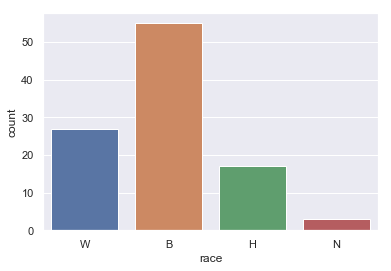

In [118]:
#Without converting the calculation for population proportion
sns.countplot(age21DataA['race']);

Replotting with adjusted percentages to enforce the overwhelming presence of minority fatalities in the dataset. In addition we review trends relating race, age under 21, and threat level. 

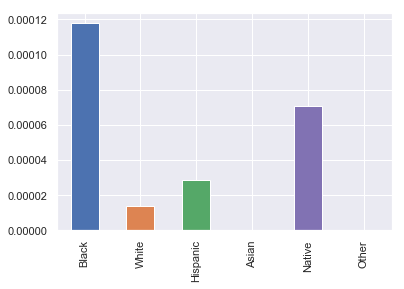

In [70]:
#Converting to percent total population
race21CountA = getRaceCounts(age21DataA)
race21CountA_Series = pd.Series(race21CountA, index = index)
race21CountA_Series.plot.bar();

Once more minorities, specifically african americans, are the most heavily prevalent race when looking at fatal shootings among young adults. Caucasians and Asians on the other hand are the lease present race of young adults. 

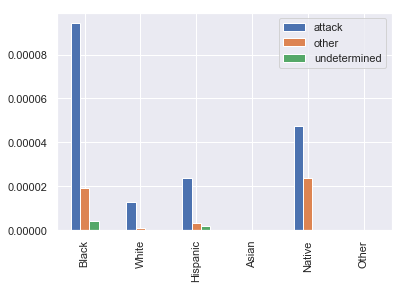

In [72]:
#Data adjusted with pop
attack = age21DataA.loc[(age21DataA['threat_level'] == 'attack')]
other = age21DataA.loc[(age21DataA['threat_level'] == 'other')] 
undetermindend = age21DataA.loc[(age21DataA['threat_level'] == 'undetermined')]
race21CountA_T_Series = pd.DataFrame({'attack': getRaceCounts(attack), 'other': getRaceCounts(other), 
                                      'undetermined':getRaceCounts(undetermindend)}, index = index)
race21CountA_T_Series.plot.bar();

## Analysis of Incidents with Reported Mental Health Issues

Issues relating to the way police handle individuals with mental illness have also been expressed in the media and this dataset happens to have a column dedicated to "signs of mental illness". Although this is not a guarenteed diagnosis of an actual mental illness, it is still an opportunity to take a glimpse into the way police may handle such situations. In order to do so we isolate instances where signs of mental illness are labeled true and plot them against whether the individual was armed with a gun, something other than a gun, or compeltely unarmed. Situations may arise when police may use excessive force against an individual with a mental illness who is "armed" with something other than a gun when said individual may not have been dangerous to begin with. 

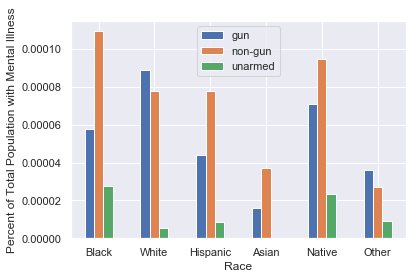

In [104]:
#With whether individual was armed against race, issues with the mental illness column

mental = df.loc[(df['signs_of_mental_illness'] == True) & (df['armed'] != 'gun')]

mental_armed = df.loc[(df['signs_of_mental_illness'] == True) & (df['armed'] == 'gun')]

mental_unarmed = df.loc[(df['signs_of_mental_illness'] == True) & (df['armed'] == 'unarmed')]

doubleplot = pd.DataFrame({'gun': getRaceCounts(mental_armed), 'non-gun': getRaceCounts(mental), 'unarmed':getRaceCounts(mental_unarmed)},index = index)

axes = doubleplot.plot.bar(rot = 0)
axes.set_xlabel('Race')
axes.set_ylabel('Percent of Total Population with Mental Illness');

### Fatally Shot by Police While Unarmed

More unarmed black people are fatally shot by police than any other race. The count of people who are armed per race who were then fatally shot remain realtively consistent among each race although it is higher among African Americans and the lowest among Asian Americans. 

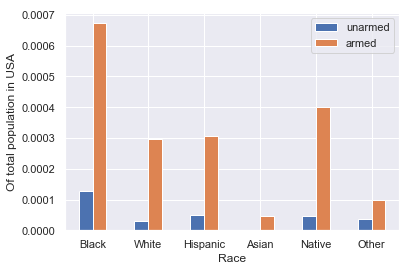

In [106]:

unarmed = df.loc[df['armed'] == 'unarmed']
armed = df.loc[df['armed'] == 'gun']

armed_plot = pd.DataFrame({'unarmed':getRaceCounts(unarmed),'armed':getRaceCounts(armed)},index = index)
ax = armed_plot.plot.bar(rot = 0)
ax.set_xlabel('Race')
ax.set_ylabel('Of Total Population in USA');


### Mental Health and Age 

In [75]:
age65 = (df['age'] >= 65)
age65Data = df.loc[age65]
age65Data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
19,38,Jimmy Foreman,2015-01-09,shot,gun,71.0,M,W,England,AR,False,attack,Not fleeing,False
29,52,Talbot Schroeder,2015-01-14,shot,knife,75.0,M,W,Old Bridge,NJ,False,attack,Not fleeing,False
30,54,Robert Edwards,2015-01-14,shot,gun,68.0,M,W,Lake Jackson,TX,False,attack,Not fleeing,False
43,83,Carter Castle,2015-01-18,shot and Tasered,gun,67.0,M,W,Gunlock,KY,True,attack,Not fleeing,False
61,324,Raymond Kmetz,2015-01-26,shot,gun,68.0,M,W,New Hope,MN,True,attack,Not fleeing,False
92,554,James Allen,2015-02-07,shot,gun,74.0,M,B,Gastonia,NC,False,attack,Not fleeing,False
127,255,Douglas Harris,2015-02-20,shot,gun,77.0,M,B,Birmingham,AL,True,attack,Not fleeing,False
273,358,Donald Allen,2015-04-11,shot,gun,66.0,M,W,Sand Springs,OK,True,attack,Not fleeing,True
275,357,Richard Dale Weaver,2015-04-12,shot,machete,83.0,M,W,Oklahoma City,OK,True,other,Not fleeing,False
284,369,Stanley Watson,2015-04-15,shot,gun,72.0,M,W,Cañon City,CO,True,attack,Not fleeing,False


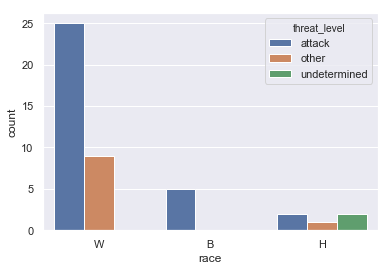

In [76]:
sns.countplot(age65Data['race'], hue= age65Data['threat_level']);

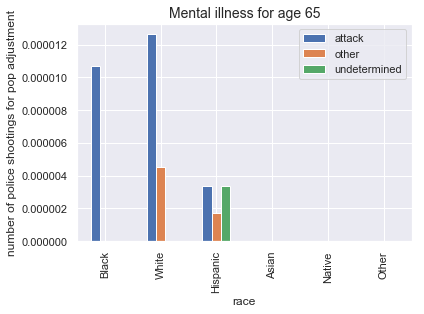

In [117]:
#Data adjusted with pop
attack65 = age65Data.loc[(age65Data['threat_level'] == 'attack')]
other65 = age65Data.loc[(age65Data['threat_level'] == 'other')] 
undetermindend65 = age65Data.loc[(age65Data['threat_level'] == 'undetermined')]
race65CountT_DF = pd.DataFrame({'attack': getRaceCounts(attack65), 'other': getRaceCounts(other65), 
                                      'undetermined':getRaceCounts(undetermindend65)}, index = index)
race65CountT_DF.plot.bar();
plt.title('Mental illness for age 65',fontsize = 14)
plt.ylabel('number of police shootings for pop adjustment');
plt.xlabel('race');


In [78]:
npage65racearray = np.array(age65Data.race.value_counts())
npage65threatarray = np.array(age65Data.threat_level.value_counts())

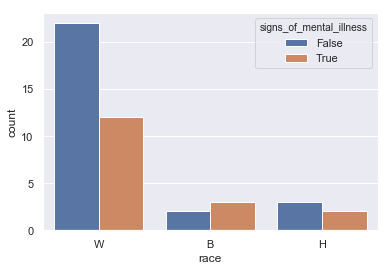

In [79]:
sns.countplot(age65Data['race'], hue = age65Data['signs_of_mental_illness']);

## Body Camera and Time Trend Analysis

Body Cameras were initially introduced in 2013 and were said to be widely used by 95% of major police forces by 2015 according to the article [here](https://assets.bwbx.io/documents/users/iqjWHBFdfxIU/rvnT.EAJQwK4/v0). We wish to investigate this further. Are body cameras really used in these instances as is reported by police?

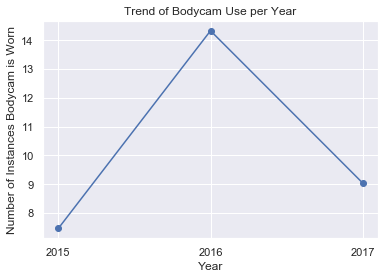

In [80]:
def dateSplit(df):
    yearl = []
    monthl = []
    dayl = []
    for x in df['date']: 
        year,month,day = x.split("-")
        yearl.append(year)
        monthl.append(month)
        dayl.append(day)

    bdcount2015 = 0
    bdcount2016 = 0
    bdcount2017 = 0
    
    for x in yearl: 
        if x == '2015': 
            bdcount2015 += 1
        if x == '2016': 
            bdcount2016 += 1
        if x == '2017':
            bdcount2017 += 1
#        if x == '2018':
#            bdcount2018 += 1 
    return [bdcount2015, bdcount2016, bdcount2017]

bd = df.loc[df['body_camera'] == True]
bd = bd.sort_values(by = ['date']) #How many instances per year where bodycam is true 

by_date = df.sort_values(by = ['date'])
acc = np.array(dateSplit(by_date),dtype = np.float) #How many instances per year in total

bodycam_per_year = np.array(dateSplit(bd),dtype = np.float)

div_compare = bodycam_per_year/acc * 100 #percent of instances where bodycam is true plot against year 
x = ['2015', '2016','2017']
bdf = pd.DataFrame({'year':x, 'counts':div_compare})
plt.plot('year', 'counts', data = bdf, linestyle='-', marker='o')
plt.title('Trend of Bodycam Use per Year')
plt.xlabel('Year')
plt.ylabel('Number of Instances Bodycam is Worn');

For the connected scatter plot above, we seperated, sorted, and counted each fatal incident by year taking into consideration the small amount of entries in 2017 (likely due to this dataset being published in 2017 itself) by finding a percentage for incidents where body cameras were used against total incidents for that year. Evidently this dataset shows the claims made in the aformentioned article are not completely true. The trend is as expected with the increase in average use between 2015 and 2016 and an unexplained significant decline in use for the entries of 2017.  

## Analysis of Incident Areas by State and City

Finally we checked which cities have the most fatal police shootings. This is represented by a line graph. Los Angeles appears to be the most dangerous along with Houston, Pheonix and Chicago. The rest of the cities are definitely less dangerous.

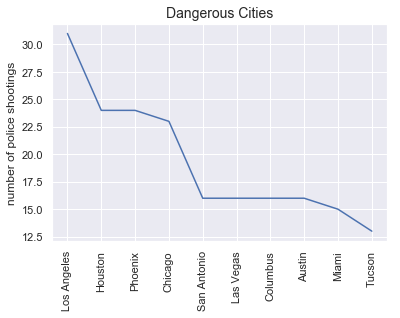

In [107]:
group_city = df['city'].value_counts()
group_city = pd.DataFrame(group_city).reset_index()
group_city = group_city.head(10)
cities = group_city['index']
counts = np.array(group_city['city'])
plt.plot(cities, counts,linestyle = '-')
plt.xticks(rotation = 90);
plt.title('Dangerous Cities',fontsize = 14)
plt.ylabel('number of police shootings');


The most dangerous states where the most police shooting occur happend at California, Texas and Florida while the states with the least amount of police shootings are Vermont, North Dakota and Rhode Island

Text(0.5,0,'States')

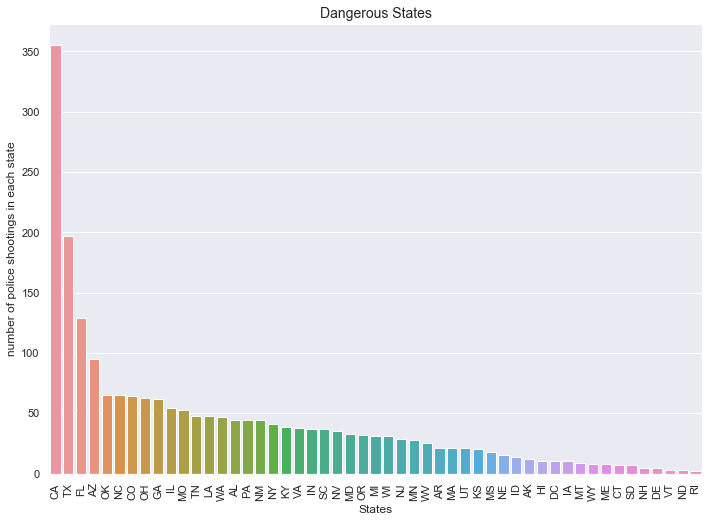

In [112]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
stateplot = sns.barplot(x = df.state.value_counts().index, y = df.state.value_counts())
stateplot.set_xticklabels(stateplot.get_xticklabels(),rotation=90);
plt.title('Dangerous States',fontsize = 14)
plt.ylabel('number of police shootings in each state');
plt.xlabel('States')


## Conclusion

From the analysis of the dataset we obtained, it is evident that media portrayal of fatal police shootings are true. Minorities are the largest affected population of police shootings, specifically African Americans across different age groups, armed vs unarmed, and even mental health situations. It is also the case that these same minority groups are the most armed in these scenerios. From the data collected and analysis obtained, we look forward to further pursuing ideas we presented in this case study. More specifically, we wish to further explore how well Police handle individuals with properly diagnosed mental illnesses as well as a deeper analysis into the use of body cameras to see if preliminary results obtained from this dataset hold true. 